<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass classification - Weather prediction

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data ingestion

In [2]:
import pandas as pd
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
df = pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

### Step 2- Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [6]:
df.duplicated().sum()

0

### Step 3 - Seperate X and Y(Weather Type)

In [7]:
X = df.drop(columns=["Weather Type"])
Y = df[["Weather Type"]]

In [8]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [9]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


In [10]:
Y.value_counts()

,count
Weather Type,
Cloudy,3300
Rainy,3300
Snowy,3300
Sunny,3300


### Step 4- Perform preprocessing on X

In [11]:
X.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['Cloud Cover', 'Season', 'Location']

In [14]:
con

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [18]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform = "pandas")

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [21]:
Y.value_counts()

,count
Weather Type,
Cloudy,3300
Rainy,3300
Snowy,3300
Sunny,3300


### Apply one hot ecoding on Y data

In [22]:
ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False
).set_output(transform = "pandas")

Y_pre = ohe.fit_transform(Y)

Y_pre.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0


### Step 5 - Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y_pre, test_size=0.2, random_state=42)

In [24]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [25]:
ytrain.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0.0,1.0,0.0,0.0
2239,0.0,1.0,0.0,0.0
3608,0.0,0.0,0.0,1.0
6848,0.0,1.0,0.0,0.0
6119,1.0,0.0,0.0,0.0


In [26]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [27]:
ytest.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
4111,0.0,0.0,0.0,1.0
10607,0.0,0.0,0.0,1.0
7372,0.0,0.0,0.0,1.0
11786,0.0,0.0,1.0,0.0
12227,0.0,0.0,0.0,1.0


In [32]:
ytrain.shape[1]

4

### Step 6 - Build the neural network

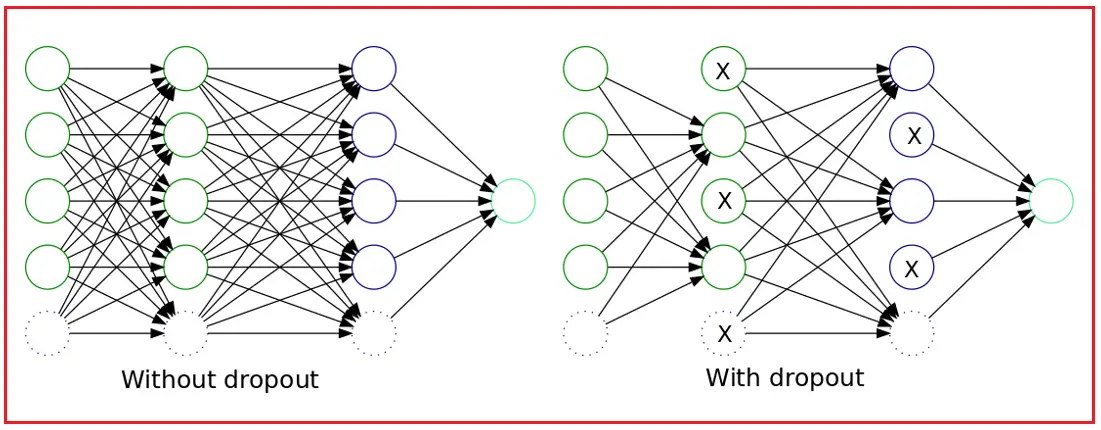

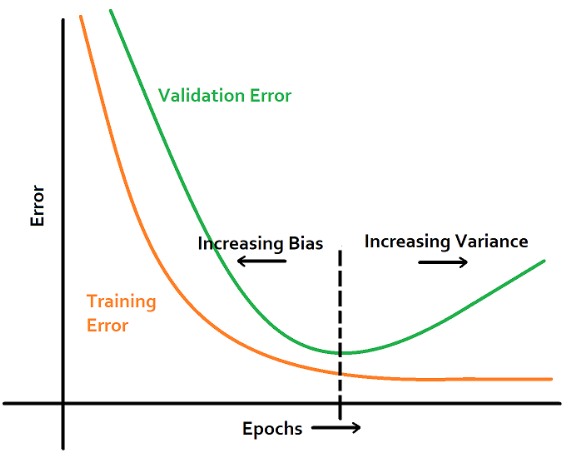

In [31]:
xtrain.shape

(10560, 18)

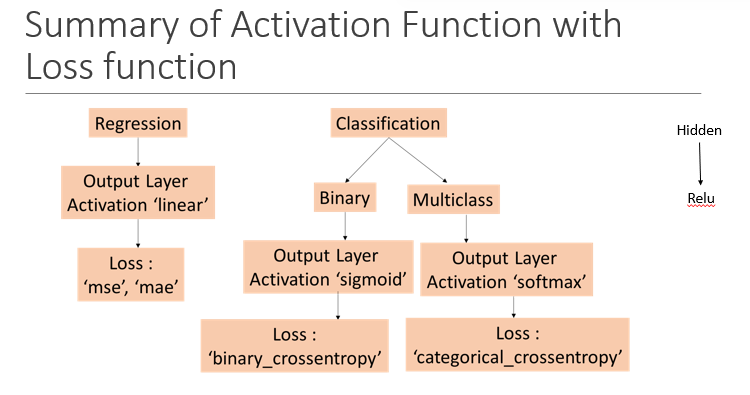

In [29]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [33]:
# Intitililaze the neural network
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add the hidden layer 1
model.add(Dense(units=32, activation="relu"))

# Add dropout layer
model.add(Dropout(rate=0.2))

# Add hidden layer 2
model.add(Dense(units=16, activation="relu"))

# Add dropout layer
model.add(Dropout(rate=0.1))

# Output layer (softmax)
model.add(Dense(units=ytrain.shape[1], activation="softmax"))



In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204 (4.70 KB)

 Trainable params: 1,204 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
es = EarlyStopping(monitor="val_loss", patience=20)

In [37]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=200, callbacks=[es])

Epoch 1/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6328 - loss: 0.9856 - val_accuracy: 0.8665 - val_loss: 0.4514
Epoch 2/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.5004 - val_accuracy: 0.8911 - val_loss: 0.3233
Epoch 3/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8632 - loss: 0.4038 - val_accuracy: 0.9025 - val_loss: 0.2808
Epoch 4/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.3641 - val_accuracy: 0.9039 - val_loss: 0.2586
Epoch 5/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3499 - val_accuracy: 0.9086 - val_loss: 0.2449
Epoch 6/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8937 - loss: 0.2995 - val_accuracy: 0.9091 - val_loss: 0.2350
Epoch 7/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8838 - loss: 0.3075 - val_accuracy: 0.9081 - val_loss: 0.2290
Epoch 8/200
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8887 - loss: 0.2877 - val_accu

### Plot the learning curve

In [38]:
import matplotlib.pyplot as plt

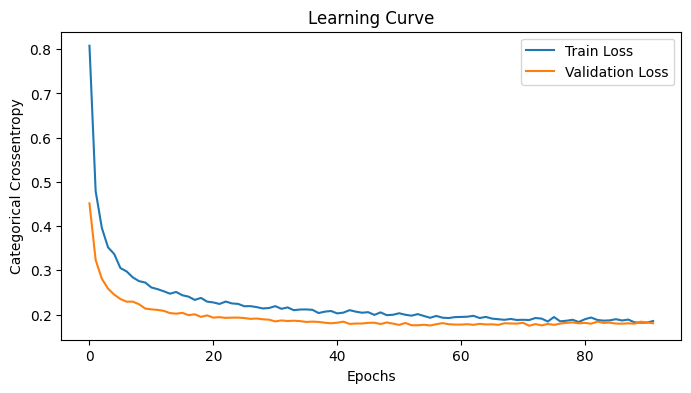

In [39]:
plt.figure(figsize=(8, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy")
plt.legend()
plt.show()

In [40]:
model.evaluate(xtrain, ytrain)

330/330 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9210 - loss: 0.1640


[0.1654629111289978, 0.921875]

In [41]:
model.evaluate(xtest, ytest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9034 - loss: 0.2057


[0.20322062075138092, 0.9071969985961914]